<h4>Antes de empezar</h4>

In [51]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

<h1>Importar datos</h1>

In [53]:
import pandas as pd

xls = pd.ExcelFile('data/Y2015_33010.xlsx')
df = xls.parse('Y2015_33010', skiprows=4, index_col=None, na_values=['NaN'])
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [54]:
df.head()

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
0,CARDIOVASCULAR,33010.0,80S,NaN,0.00,0.00
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88
3,CARDIOVASCULAR,33011.0,80S,NaN,0.00,0.00
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49


<h1>Preprocesamiento de datos</h1>
<h3>1. Limpieza de datos</h3>

In [55]:
df = df[df['MODIFIER'] == 'TOTAL'].dropna()

In [56]:
df.head()

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22
14,CARDIOVASCULAR,33025.0,TOTAL,6653.0,4070839.95,3162574.29


In [57]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
count,5068.000000,5.068000e+03,5.068000e+03,5.068000e+03
mean,39518.161405,3.394709e+04,4.409164e+06,3.390012e+06
std,15989.769082,7.979756e+05,3.663517e+07,2.825897e+07
min,10021.000000,1.100000e+01,1.354800e+02,8.981000e+01
25%,27095.750000,1.090000e+02,5.887076e+04,4.578995e+04
50%,35696.000000,5.095000e+02,2.492534e+05,1.926762e+05
75%,52317.250000,2.966750e+03,1.221123e+06,9.406879e+05
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09


In [58]:
df.shape

(5068, 6)

<h3>2. Analizar transformaciones de variables</h3>

In [59]:
df['AVERAGE ALLOWED CHARGES'] = df['ALLOWED CHARGES'] / df['ALLOWED SERVICES']
df['AVERAGE PAYMENT'] = df['PAYMENT'] / df['ALLOWED SERVICES']

In [60]:
df.head()

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88,109.226581,84.686639
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49,113.704405,88.458214
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81,485.161024,378.145180
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22,613.800519,471.456370
14,CARDIOVASCULAR,33025.0,TOTAL,6653.0,4070839.95,3162574.29,611.880347,475.360633


In [61]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
count,5068.000000,5.068000e+03,5.068000e+03,5.068000e+03,5068.000000,5068.000000
mean,39518.161405,3.394709e+04,4.409164e+06,3.390012e+06,625.739146,485.280287
std,15989.769082,7.979756e+05,3.663517e+07,2.825897e+07,545.394788,424.973247
min,10021.000000,1.100000e+01,1.354800e+02,8.981000e+01,2.999717,2.929552
25%,27095.750000,1.090000e+02,5.887076e+04,4.578995e+04,254.367483,195.990117
50%,35696.000000,5.095000e+02,2.492534e+05,1.926762e+05,492.231567,381.338796
75%,52317.250000,2.966750e+03,1.221123e+06,9.406879e+05,828.012836,640.126760
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09,8460.605567,6591.287453


In [62]:
df.shape

(5068, 8)

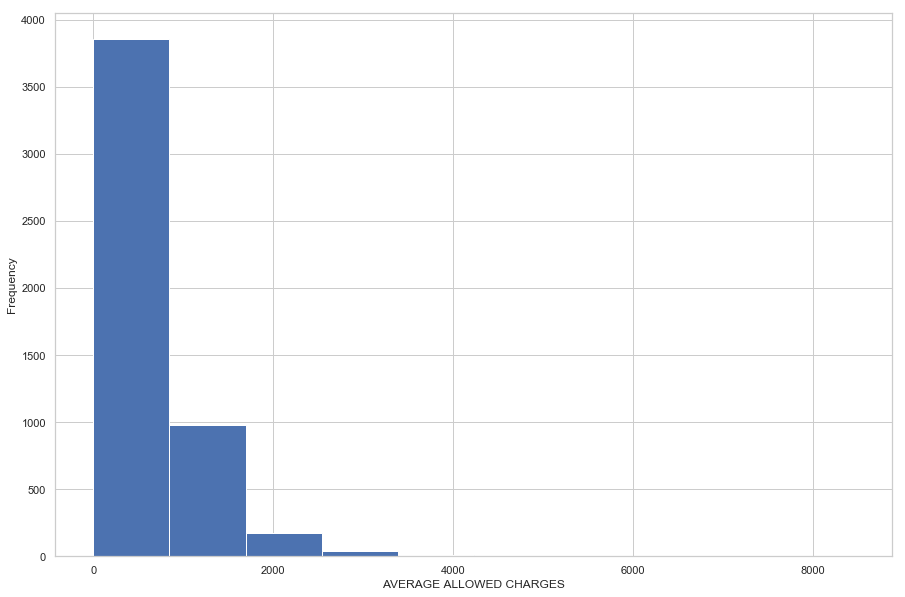

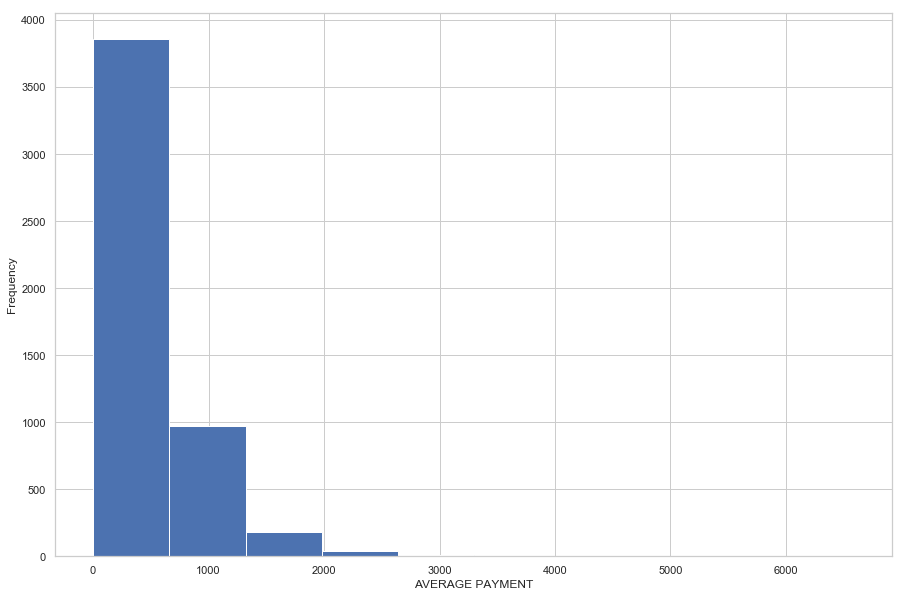

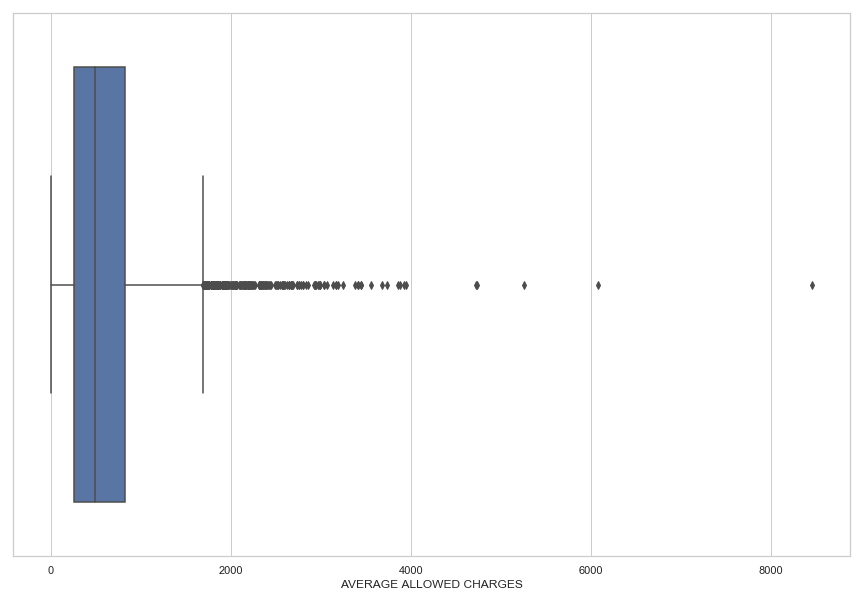

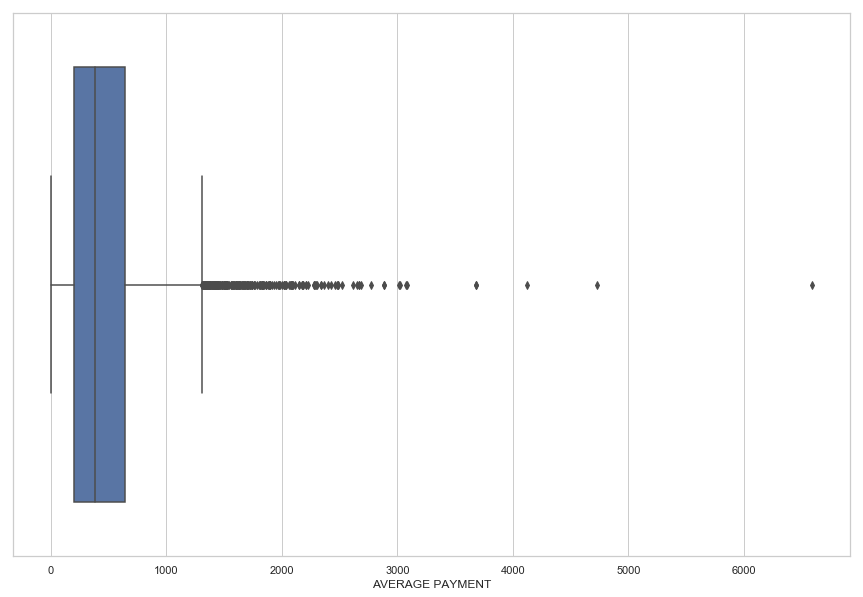

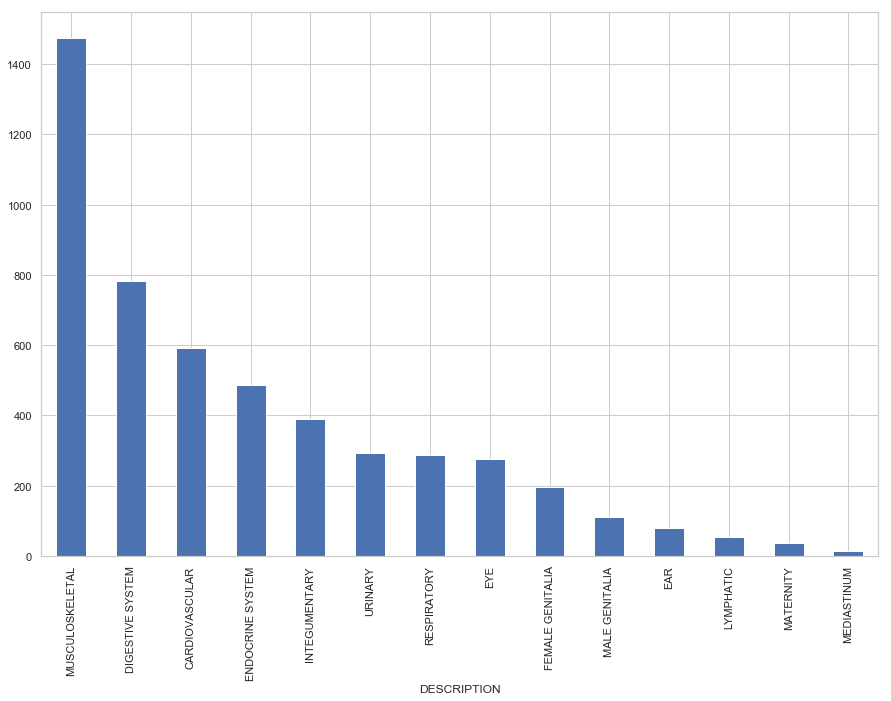

In [63]:
import seaborn as sns

df['AVERAGE ALLOWED CHARGES'].plot(kind='hist')
plt.xlabel('AVERAGE ALLOWED CHARGES')
plt.show()

df['AVERAGE PAYMENT'].plot(kind='hist')
plt.xlabel('AVERAGE PAYMENT')
plt.show()

sns.set(style='whitegrid')
ax_aac = sns.boxplot(x=df['AVERAGE ALLOWED CHARGES'])
plt.show()

sns.set(style='whitegrid')
ax_ap = sns.boxplot(x=df['AVERAGE PAYMENT'])
plt.show()

df['DESCRIPTION'].value_counts().plot(kind='bar')
plt.xlabel('DESCRIPTION')
plt.show()

<h4>Cambio de la variable categórica a numérica</h4>

In [64]:
one_hot = pd.get_dummies(df['DESCRIPTION'])
df = df.drop('DESCRIPTION',axis = 1)
df = df.join(one_hot)

In [65]:
df.head()

,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,CARDIOVASCULAR,DIGESTIVE SYSTEM,EAR,...,EYE,FEMALE GENITALIA,INTEGUMENTARY,LYMPHATIC,MALE GENITALIA,MATERNITY,MEDIASTINUM,MUSCULOSKELETAL,RESPIRATORY,URINARY
2,33010.0,TOTAL,5151.0,562626.12,436220.88,109.226581,84.686639,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33011.0,TOTAL,84.0,9551.17,7430.49,113.704405,88.458214,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,33015.0,TOTAL,1025.0,497290.05,387598.81,485.161024,378.145180,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,33020.0,TOTAL,270.0,165726.14,127293.22,613.800519,471.456370,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,33025.0,TOTAL,6653.0,4070839.95,3162574.29,611.880347,475.360633,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,CARDIOVASCULAR,DIGESTIVE SYSTEM,EAR,ENDOCRINE SYSTEM,EYE,FEMALE GENITALIA,INTEGUMENTARY,LYMPHATIC,MALE GENITALIA,MATERNITY,MEDIASTINUM,MUSCULOSKELETAL,RESPIRATORY,URINARY
count,5068.000000,5.068000e+03,5.068000e+03,5.068000e+03,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000
mean,39518.161405,3.394709e+04,4.409164e+06,3.390012e+06,625.739146,485.280287,0.116614,0.154696,0.015785,0.095896,0.054262,0.038477,0.076953,0.010655,0.022099,0.007103,0.002565,0.290845,0.056433,0.057616
std,15989.769082,7.979756e+05,3.663517e+07,2.825897e+07,545.394788,424.973247,0.320992,0.361650,0.124656,0.294477,0.226556,0.192363,0.266544,0.102682,0.147022,0.083990,0.050587,0.454197,0.230778,0.233040
min,10021.000000,1.100000e+01,1.354800e+02,8.981000e+01,2.999717,2.929552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27095.750000,1.090000e+02,5.887076e+04,4.578995e+04,254.367483,195.990117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35696.000000,5.095000e+02,2.492534e+05,1.926762e+05,492.231567,381.338796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52317.250000,2.966750e+03,1.221123e+06,9.406879e+05,828.012836,640.126760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09,8460.605567,6591.287453,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df.shape

(5068, 21)

<h4>Análisis de correlación</h4>

In [77]:
import numpy as np
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

df_numeric = df[df.columns.difference(['HCPCS', 'MODIFIER'])]

ss = StandardScaler()
df_std = pd.DataFrame(ss.fit_transform(df_numeric), columns=df_numeric.columns)

joblib.dump(ss, 'ss.joblib', compress=9)

df_corr = df_std.corr()
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,ALLOWED CHARGES,ALLOWED SERVICES,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,CARDIOVASCULAR,DIGESTIVE SYSTEM,EAR,ENDOCRINE SYSTEM,EYE,FEMALE GENITALIA,INTEGUMENTARY,LYMPHATIC,MALE GENITALIA,MATERNITY,MEDIASTINUM,MUSCULOSKELETAL,PAYMENT,RESPIRATORY,URINARY
ALLOWED CHARGES,1,0.201043,0.0147102,0.0145504,0.00872105,-0.0117918,-0.00874843,0.000198496,0.0630872,-0.0187166,0.0547266,-0.00812625,-0.013705,-0.00859159,-0.00543948,-0.0305609,0.999736,-0.013981,-0.00784814
ALLOWED SERVICES,0.201043,1,-0.038685,-0.0385896,0.0291284,-0.0119375,-0.00159467,-0.00624214,1.47941e-05,-0.00769159,0.0412477,-0.00346332,-0.00587358,-0.00347106,-0.00209623,-0.0184624,0.21215,-0.00711065,-0.00373602
AVERAGE ALLOWED CHARGES,0.0147102,-0.038685,1,0.999794,0.102161,0.0158159,0.0659006,0.16208,-0.0191482,-0.0405768,-0.12472,-0.0414937,-0.0312314,0.00203187,-0.00753498,-0.0709977,0.0158936,0.0068547,-0.040086
AVERAGE PAYMENT,0.0145504,-0.0385896,0.999794,1,0.103683,0.0164903,0.0643645,0.161537,-0.0195144,-0.0409094,-0.124551,-0.0411249,-0.0317871,0.00154451,-0.00733162,-0.0718389,0.0157408,0.00671707,-0.0391875
CARDIOVASCULAR,0.00872105,0.0291284,0.102161,0.103683,1,-0.15543,-0.0460131,-0.118329,-0.0870288,-0.0726807,-0.104906,-0.0377055,-0.054619,-0.0307313,-0.0184252,-0.23268,0.00993482,-0.0888543,-0.0898379
DIGESTIVE SYSTEM,-0.0117918,-0.0119375,0.0158159,0.0164903,-0.15543,1,-0.054177,-0.139323,-0.10247,-0.0855761,-0.123519,-0.0443954,-0.0643097,-0.0361838,-0.0216942,-0.273964,-0.0116358,-0.104619,-0.105777
EAR,-0.00874843,-0.00159467,0.0659006,0.0643645,-0.0460131,-0.054177,1,-0.0412451,-0.030335,-0.0253338,-0.0365665,-0.0131428,-0.0190382,-0.0107118,-0.00642233,-0.0811039,-0.00901246,-0.0309713,-0.0313142
ENDOCRINE SYSTEM,0.000198496,-0.00624214,0.16208,0.161537,-0.118329,-0.139323,-0.0412451,1,-0.0780105,-0.0651493,-0.0940357,-0.0337983,-0.0489592,-0.0275468,-0.0165159,-0.208569,0.000208973,-0.0796469,-0.0805285
EYE,0.0630872,1.47941e-05,-0.0191482,-0.0195144,-0.0870288,-0.10247,-0.030335,-0.0780105,1,-0.0479161,-0.0691616,-0.0248581,-0.0360086,-0.0202602,-0.0121471,-0.153399,0.0632709,-0.0585789,-0.0592273
FEMALE GENITALIA,-0.0187166,-0.00769159,-0.0405768,-0.0409094,-0.0726807,-0.0855761,-0.0253338,-0.0651493,-0.0479161,1,-0.0577592,-0.0207598,-0.030072,-0.01692,-0.0101445,-0.128109,-0.0186741,-0.0489212,-0.0494628


<h4>Aplicando PCA</h4>

<Figure size 1080x720 with 0 Axes>

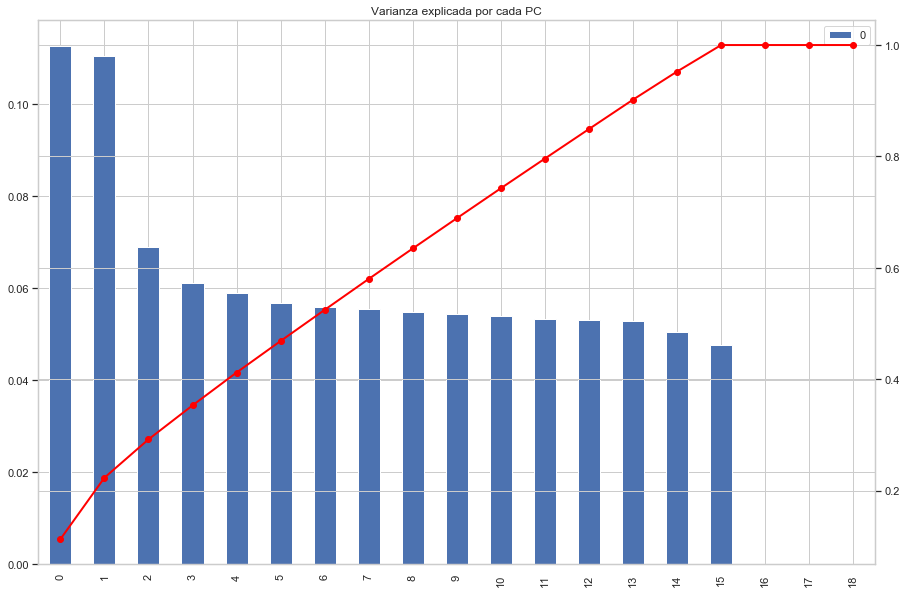

In [73]:
from sklearn.decomposition import PCA

X = df_std

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X))

joblib.dump(pca, 'pca.joblib', compress=9)

explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

fig = plt.figure()
ax = pd.DataFrame(explained_variance).plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), pd.DataFrame(cum_explained_variance).values, linestyle='-', marker='o', linewidth=2.0, color='red')
plt.title('Varianza explicada por cada PC')
plt.show()

<h1>Modelo de clasificación</h1>

In [74]:
import matplotlib.cm as cmx
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import Axes3D

def scatter3d(x, y, z, cs, title, xlabel, ylabel, zlabel, cslabel):
    cm = plt.get_cmap('jet')
    cNorm = clrs.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_label(cslabel)
    plt.show()

============Training model: knn============
Fraud: 136
No Fraud: 4932


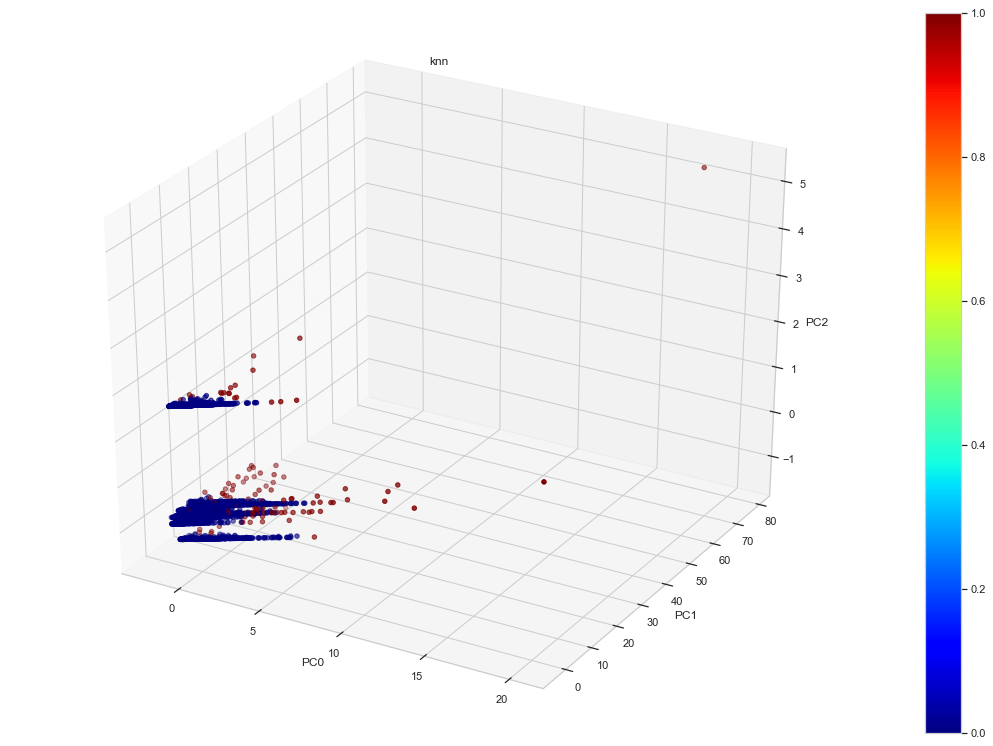

============Training model: autoencoder============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_25 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 19)                380       
_________________________________________________________________
dropout_26 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                200       
_________________________________________________________________
dropout_27 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_32 (Dense)        

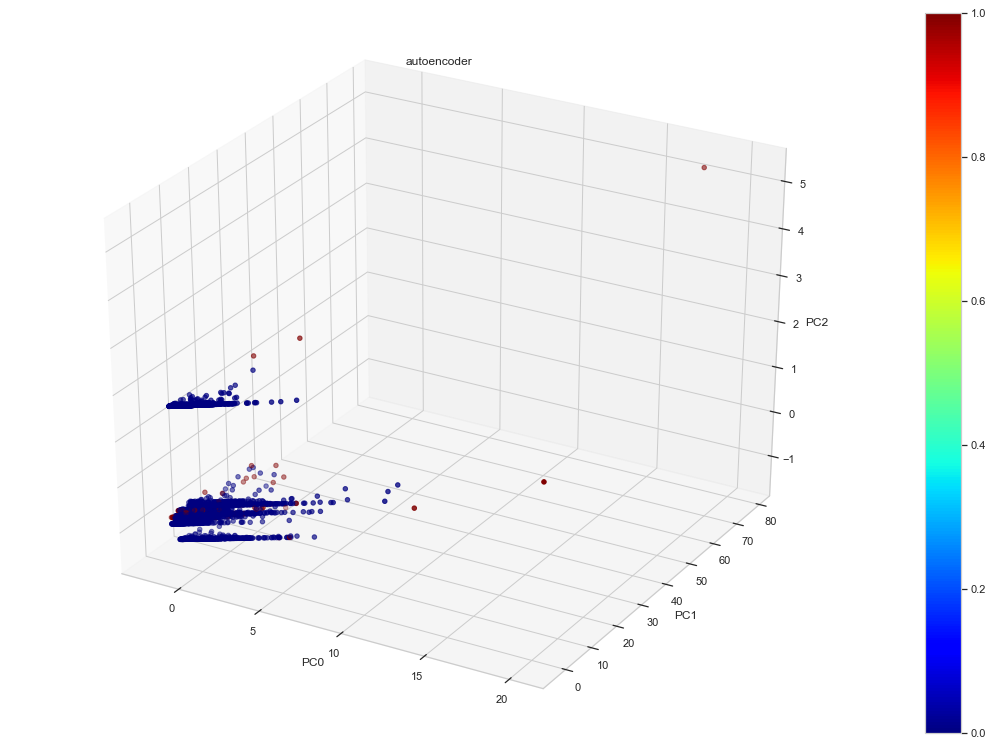

In [75]:
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_pca, test_size=0.3)

contamination = 0.025
clfs = [{'name': 'knn', 'clf': KNN(contamination=contamination)},
        {'name': 'autoencoder', 'clf': AutoEncoder(hidden_neurons=[10, 1, 1, 10],
                                                   verbose=0,
                                                   contamination=contamination)}]

for obj in clfs:
    clf_name = obj['name']
    clf = obj['clf']

    print('============Training model: ' + clf_name + '============')

    clf.fit(X_train)

    y_train_pred = clf.labels_
    y_test_pred = clf.predict(X_test)

    _df_train_class = X_train.assign(y=pd.Series(y_train_pred).values)
    _df_test_class = X_test.assign(y=pd.Series(y_test_pred).values)
    _df = pd.concat([_df_train_class, _df_test_class])

    print('Fraud:', _df[_df.y == 1]['y'].count())
    print('No Fraud:', _df[_df.y == 0]['y'].count())
    scatter3d(_df[0], _df[1], _df[2], _df['y'], clf_name, 'PC0', 'PC1', 'PC2', 'Fraud')
    
    df_results = df.join(_df['y'])
    df_results.to_csv(clf_name + '_results.csv')
    
    joblib.dump(clf, clf_name + '.joblib', compress=9)
